In [2]:
import pandas as pd

# Leer el archivo CSV limpio
df_clean = pd.read_csv('C:/Users/sergi/Proyectos/Proyecto_Final/data/processed/vehicles_clean.csv',quotechar='"')

# Mostrar las primeras filas del DataFrame
print(df_clean.head())

   region  price    year manufacturer                     model  condition  \
0  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt       good   
1  auburn  22590  2010.0    chevrolet            silverado 1500       good   
2  auburn  39590  2020.0    chevrolet       silverado 1500 crew       good   
3  auburn  30990  2017.0       toyota      tundra double cab sr       good   
4  auburn  15000  2013.0         ford                 f-150 xlt  excellent   

  fuel  odometer transmission drive       size    type paint_color state  \
0  gas   57923.0        other   4wd        NaN  pickup       white    al   
1  gas   71229.0        other   4wd  full-size  pickup        blue    al   
2  gas   19160.0        other   4wd        NaN  pickup         red    al   
3  gas   41124.0        other   4wd  full-size  pickup         red    al   
4  gas  128000.0    automatic   rwd  full-size   truck       black    al   

      lat     long  
0  32.590 -85.4800  
1  32.590 -85.4800  
2  32.590 -

C:\Users\sergi\AppData\Local\Temp\ipykernel_2120\2178461404.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regiones['region'] = pd.Categorical(df_regiones['region'], categories=regiones_top, ordered=True)
C:\Users\sergi\AppData\Local\Temp\ipykernel_2120\2178461404.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manu['manufacturer'] = pd.Categorical(df_manu['manufacturer'], categories=manufacturer_top, ordered=True)


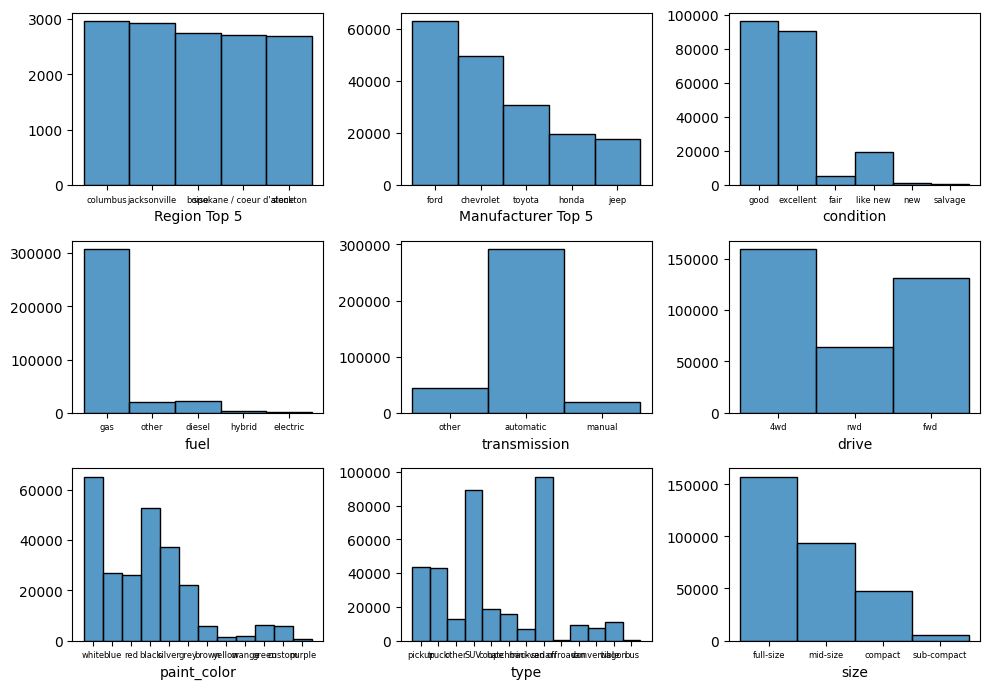

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular la frecuencia de cada región y seleccionar las 10 primeras
regiones_top = df_clean['region'].value_counts().nlargest(5).index
manufacturer_top = df_clean['manufacturer'].value_counts().nlargest(5).index


# Filtrar el DataFrame original para incluir solo estas 10 regiones y ordenarlas
df_regiones = df_clean[df_clean['region'].isin(regiones_top)]
df_regiones['region'] = pd.Categorical(df_regiones['region'], categories=regiones_top, ordered=True)
df_manu = df_clean[df_clean['manufacturer'].isin(manufacturer_top)]
df_manu['manufacturer'] = pd.Categorical(df_manu['manufacturer'], categories=manufacturer_top, ordered=True)

fig, axis = plt.subplots(3, 3, figsize=(10, 7))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=df_regiones, x="region").set(ylabel=None, xlabel = "Region Top 5")
sns.histplot(ax=axis[0, 1], data=df_manu, x="manufacturer").set(ylabel=None, xlabel = "Manufacturer Top 5")
sns.histplot(ax=axis[0, 2], data=df_clean, x="condition").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df_clean, x="fuel").set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=df_clean, x="transmission").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=df_clean, x="drive").set(ylabel=None)
sns.histplot(ax=axis[2, 0], data=df_clean, x="paint_color").set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=df_clean, x="type").set(ylabel=None)
sns.histplot(ax=axis[2, 2], data=df_clean, x="size").set(ylabel=None)

# Ajustar el tamaño de la letra de la leyenda en el eje x
for i, ax in enumerate(axis.flat):
        ax.tick_params(axis='x', labelsize=6)  # Cambia el valor de 'labelsize' según necesites

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


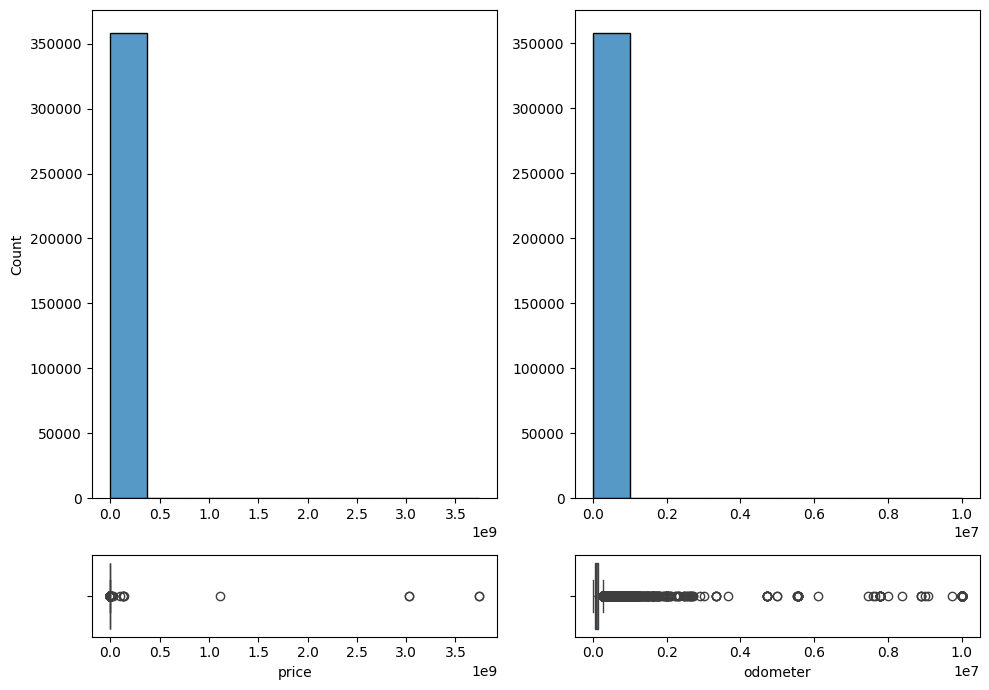

In [4]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_clean, x = "price", bins = 10).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_clean, x = "price")
sns.histplot(ax = axis[0, 1], data = df_clean, x = "odometer", bins = 10).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_clean, x = "odometer")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


In [12]:
print(df_clean[df_clean['price'] > 500000])

                         region       price    year   manufacturer  \
1496                     dothan    99999999  1993.0           ford   
24812           humboldt county  1111111111  1999.0           ford   
58032            ventura county     2000000  2002.0         saturn   
66598   fort collins / north CO      655000  2010.0       chrysler   
76822                  delaware  3024942282  2000.0  mercedes-benz   
79783     ft myers / SW florida      990000  2017.0  mercedes-benz   
88827                   orlando     6995495  2014.0          dodge   
114600  spokane / coeur d'alene    17000000  2007.0            ram   
115767  spokane / coeur d'alene   123456789  1999.0          buick   
125919              bloomington      566567  2006.0       chrysler   
130541              terre haute     1234567  2006.0           jeep   
162962                ann arbor   123456789  2015.0      chevrolet   
163433                ann arbor     1234567  2010.0        lincoln   
180818    minneapoli

In [28]:
df_clean = df_clean[df_clean['price'] <= 280000]
df_clean = df_clean[df_clean['odometer'] <= 300000]

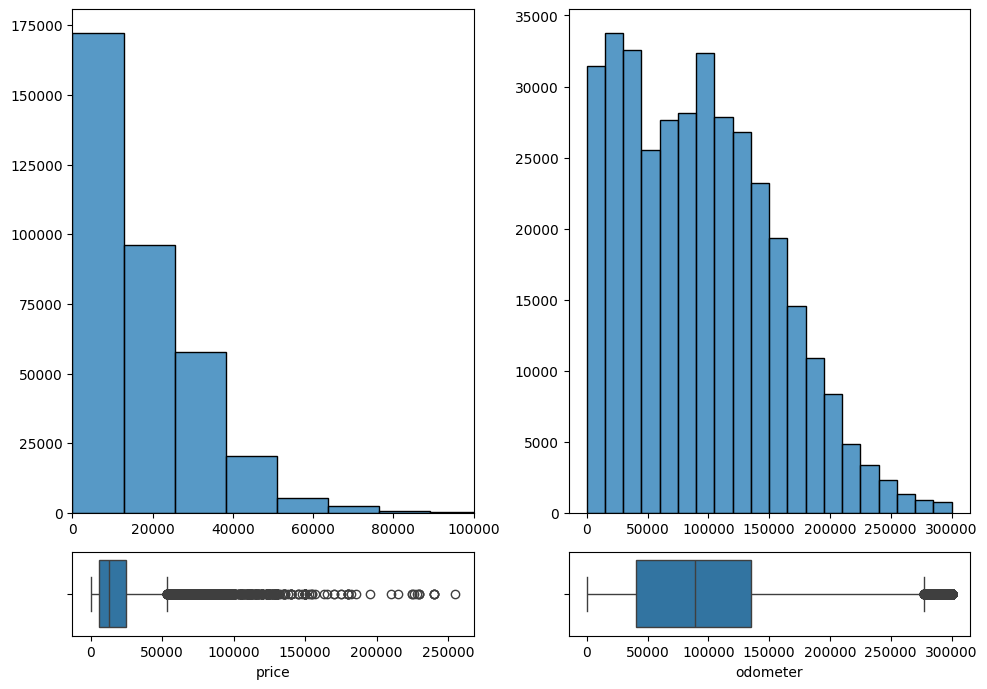

In [30]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_clean, x = "price", bins = 20).set(xlabel = None, ylabel = None)
axis[0, 0].set_xlim(0, 100000)
sns.boxplot(ax = axis[1, 0], data = df_clean, x = "price")
sns.histplot(ax = axis[0, 1], data = df_clean, x = "odometer", bins = 20).set(xlabel = None, ylabel = None)
axis[0, 0].set_xlim(0, 100000)
sns.boxplot(ax = axis[1, 1], data = df_clean, x = "odometer")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

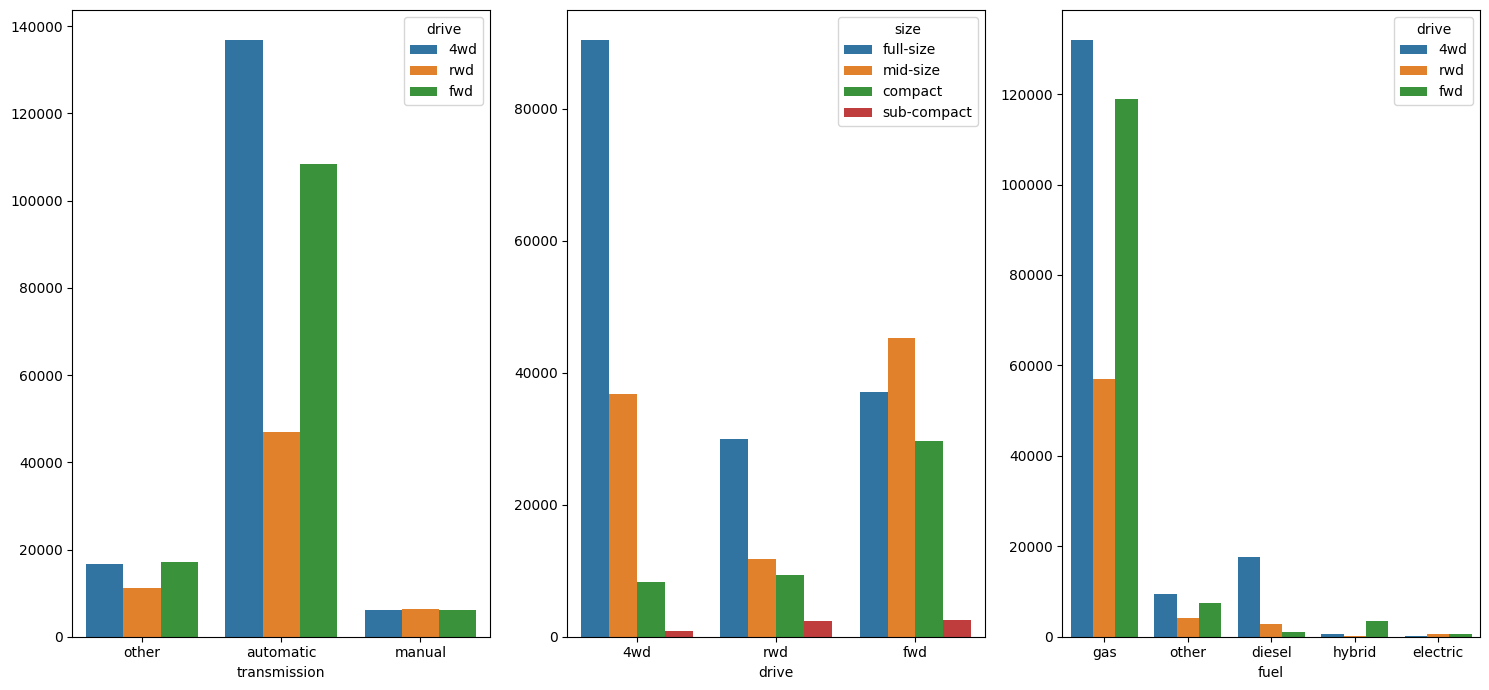

In [53]:
# Análisis categórico-categórico

fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.countplot(ax = axis[0], data = df_clean, x = "transmission", hue = "drive").set(ylabel = None)
sns.countplot(ax = axis[1], data = df_clean, x = "drive", hue = "size").set(ylabel = None)
sns.countplot(ax = axis[2], data = df_clean, x = "fuel", hue = "drive").set(ylabel = None)

plt.tight_layout()
plt.show()

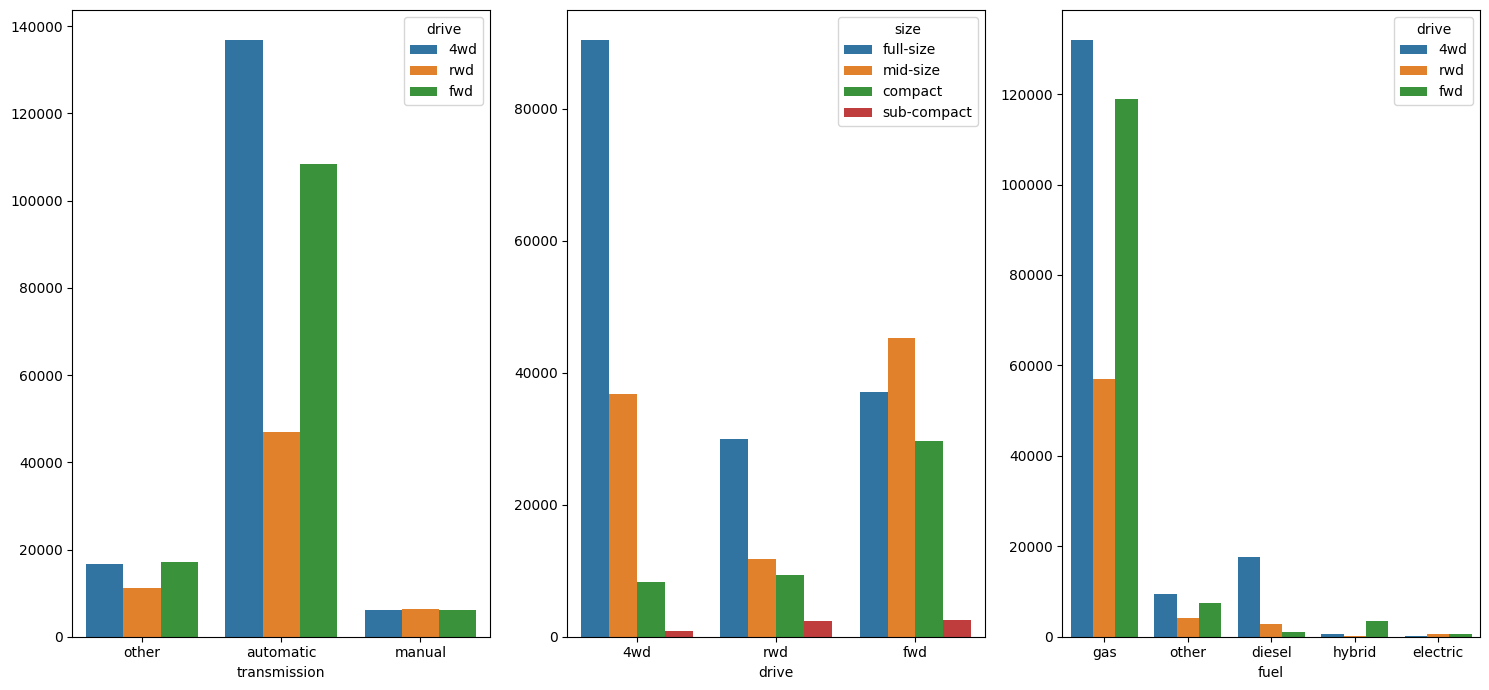

In [54]:
# Análisis categórico-categórico

fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.countplot(ax = axis[0], data = df_clean, x = "transmission", hue = "drive").set(ylabel = None)
sns.countplot(ax = axis[1], data = df_clean, x = "drive", hue = "size").set(ylabel = None)
sns.countplot(ax = axis[2], data = df_clean, x = "fuel", hue = "drive").set(ylabel = None)

plt.tight_layout()
plt.show()

In [61]:
import pandas as pd

# Agrupar los datos por región y calcular los valores más comunes en cada grupo
region_stats = df_clean.groupby('region').agg({
    'manufacturer': lambda x: x.value_counts().index[0],
    'model': lambda x: x.value_counts().index[0],
    'fuel': lambda x: x.value_counts().index[0],
    'type': lambda x: x.value_counts().index[0],
    'size': lambda x: x.value_counts().index[0],
    'paint_color': lambda x: x.value_counts().index[0]
}).reset_index()

# Mostrar la tabla
print(region_stats)

region_stats.to_csv('C:/Users/sergi/Proyectos/Proyecto_Final/data/processed/region_stats.csv')


                     region manufacturer      model fuel    type       size  \
0               SF bay area       toyota      camry  gas   sedan  full-size   
1                   abilene         ford      f-150  gas   truck  full-size   
2            akron / canton         ford   wrangler  gas     SUV  full-size   
3                    albany         ford      f-150  gas   sedan  full-size   
4               albuquerque         ford      f-150  gas   sedan  full-size   
..                      ...          ...        ...  ...     ...        ...   
399                    york         ford      civic  gas   sedan  full-size   
400              youngstown    chevrolet    equinox  gas   sedan  full-size   
401             yuba-sutter         ford         tl  gas   sedan  full-size   
402                    yuma         ford  silverado  gas  pickup  full-size   
403  zanesville / cambridge         ford   wrangler  gas     SUV  full-size   

    paint_color  
0         white  
1         white

In [68]:
# Leer el archivo CSV limpio
df_region = pd.read_csv('C:/Users/sergi/Proyectos/Proyecto_Final/data/processed/region_stats.csv',quotechar='"')


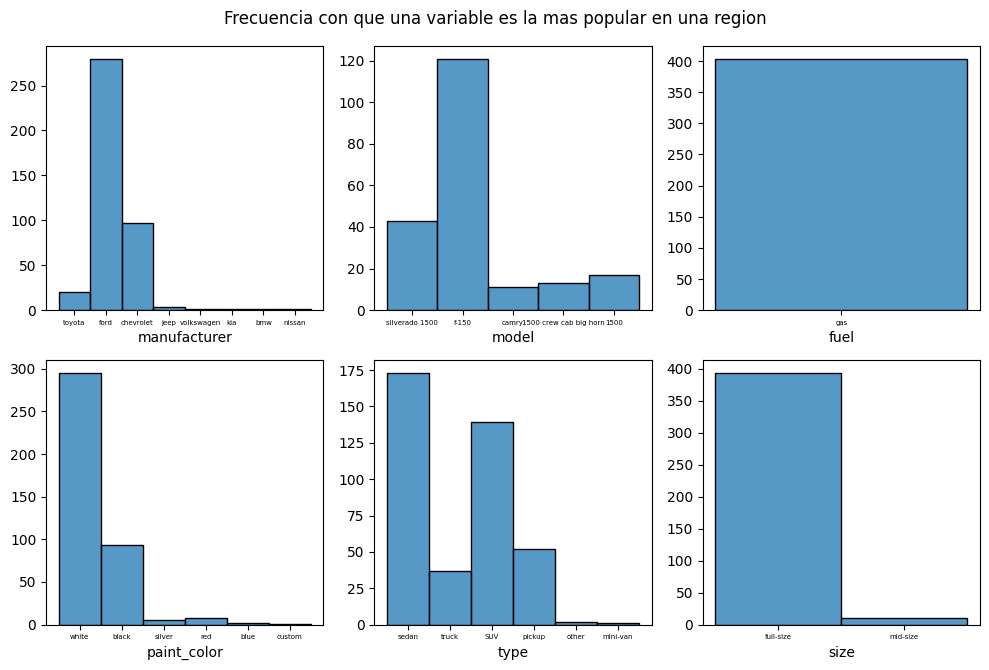

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los 5 modelos más populares
top_5_models = df_model_sorted['model'].value_counts().head(5).index
df_top_5_models = df_model_sorted[df_model_sorted['model'].isin(top_5_models)]

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=df_region, x="manufacturer").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=df_top_5_models, x="model").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=df_region, x="fuel").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df_region, x="paint_color").set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=df_region, x="type").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=df_region, x="size").set(ylabel=None)

# Ajustar el tamaño de la letra de la leyenda en el eje x
for i, ax in enumerate(axis.flat):
        ax.tick_params(axis='x', labelsize=5)  # Cambia el valor de 'labelsize' según necesites

# Ajustar el layout con más espacio en la parte superior para el título
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Agregar un título para todo el grupo de gráficos
fig.suptitle("Frecuencia con que una variable es la mas popular en una region", fontsize=12)

# Mostrar el plot
plt.show()


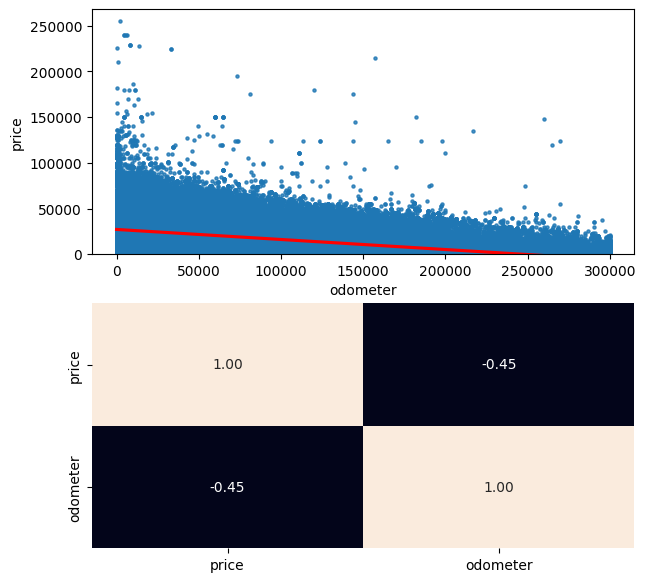

In [99]:
# Análisis numérico-numérico

fig, axis = plt.subplots(2,1, figsize = (7, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax=axis[0], data=df_clean, x="odometer", y="price", scatter_kws={'s': 5},line_kws={'color': 'red'})
sns.heatmap(df_clean[["price", "odometer"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)


# Ajustar el layout
axis[0].set_ylim(bottom=0)

# Mostrar el plot
plt.show()


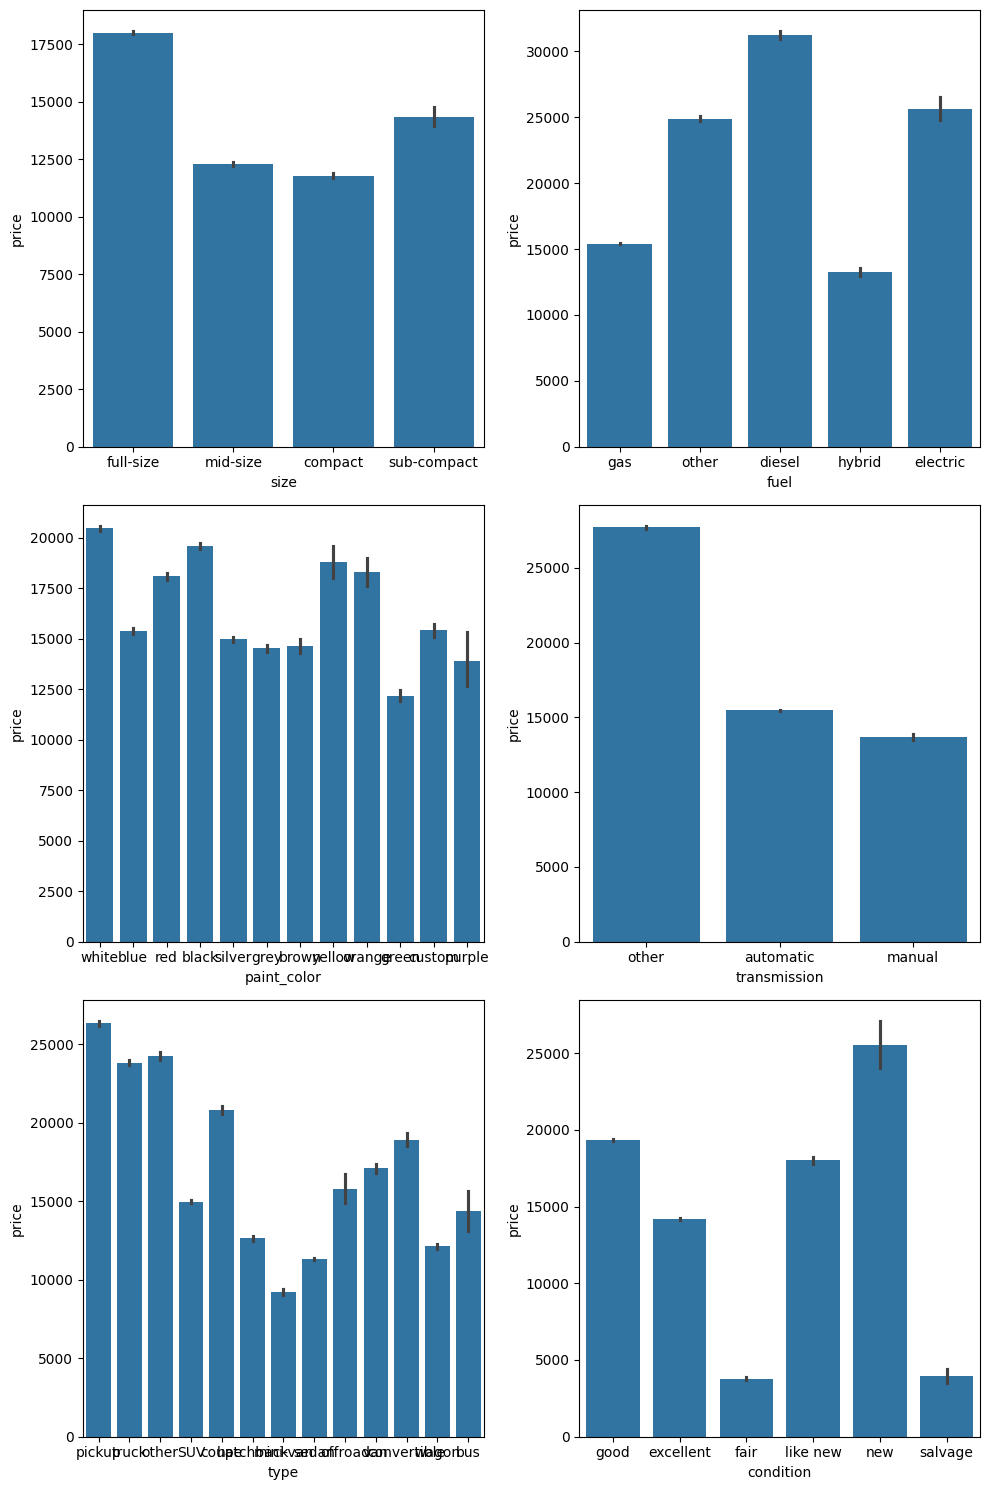

In [106]:
fig, axis = plt.subplots(3, 2, figsize=(10, 15))

sns.barplot(ax=axis[0, 0], data=df_clean, x="size", y="price")
sns.barplot(ax=axis[0, 1], data=df_clean, x="fuel", y="price")
sns.barplot(ax=axis[1, 0], data=df_clean, x="paint_color", y="price")
sns.barplot(ax=axis[1, 1], data=df_clean, x="transmission", y="price")
sns.barplot(ax=axis[2, 0], data=df_clean, x="type", y="price")
sns.barplot(ax=axis[2, 1], data=df_clean, x="condition", y="price")

# Ajustar el layout
plt.tight_layout()

plt.show()


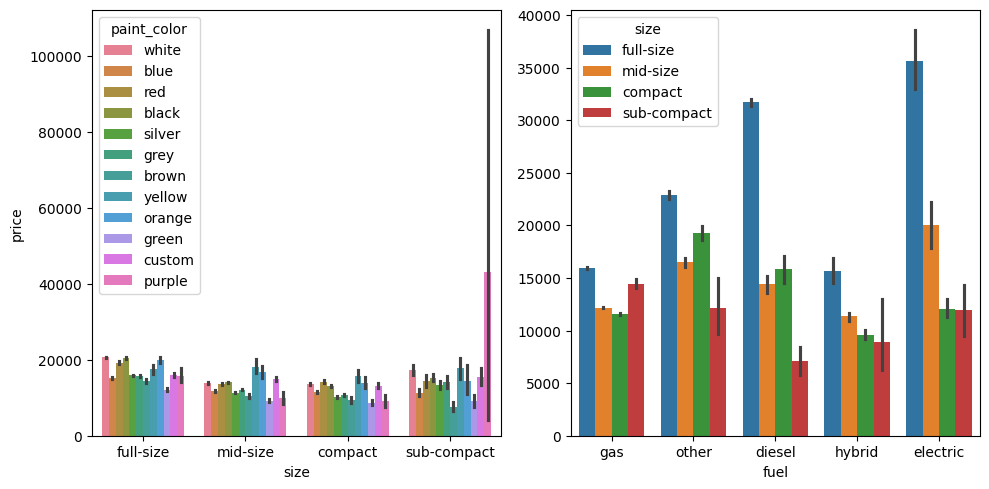

In [98]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = df_clean, x = "size", y = "price", hue = "paint_color")
sns.barplot(ax = axis[1], data = df_clean, x = "fuel", y = "price", hue = "size").set(ylabel = None)

plt.tight_layout()

plt.show()